# Dados IDH EUA
Queremos fazer uma ánalise dos dados do IDH para ver e há alguma semelhança com as votações dos EUA

In [1]:
# Importação das bibliotecas necessárias para a análise:
import pandas as pd
import seaborn as srn
import matplotlib.pyplot as plt

In [2]:
idh = pd.read_csv('./data/GDL-Sub-national-HDI-data.csv')
idh.head()

,Country,ISO_Code,Level,GDLCODE,Region,2018
0,United States,USA,National,USAt,Total,0.920
1,United States,USA,Subnat,USAr101,Alabama,0.877
2,United States,USA,Subnat,USAr102,Alaska,0.937
3,United States,USA,Subnat,USAr103,Arizona,0.908
4,United States,USA,Subnat,USAr104,Arkansas,0.877


In [15]:
candidates = pd.read_csv('./data/candidate_per_state.csv')
candidates.head()

,Unnamed: 0,state,candidate,party,total_state
0,0,Delaware,Joe Biden,DEM,296268
1,1,Delaware,Donald Trump,REP,200603
2,2,Delaware,Jo Jorgensen,LIB,5000
3,3,Delaware,Howie Hawkins,GRN,2139
4,12,District of Columbia,Joe Biden,DEM,285728


In [88]:
candidates.shape

(349, 5)

In [21]:
# Remoção do total
idh[1:].head()

,Country,ISO_Code,Level,GDLCODE,Region,2018
1,United States,USA,Subnat,USAr101,Alabama,0.877
2,United States,USA,Subnat,USAr102,Alaska,0.937
3,United States,USA,Subnat,USAr103,Arizona,0.908
4,United States,USA,Subnat,USAr104,Arkansas,0.877
5,United States,USA,Subnat,USAr105,California,0.930


In [35]:
new_idh.describe()

,2018
count,51.000000
mean,0.918235
std,0.022531
min,0.863000
25%,0.905000
50%,0.922000
75%,0.935500
max,0.956000


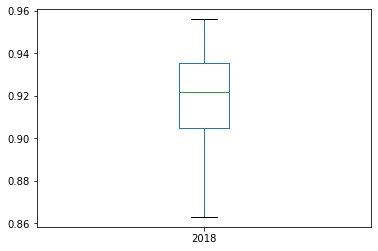

In [27]:
new_idh = idh[1:]
new_idh.boxplot(grid=False)

[Text(0, 0.5, ''), Text(0.5, 0, '2018'), Text(0.5, 1.0, 'IDH EUA')]

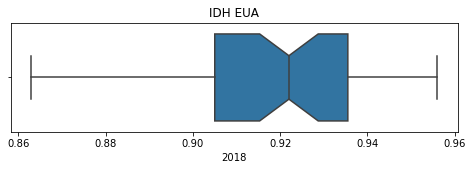

In [69]:
fig = plt.subplots(figsize=(8, 2))
ax = srn.boxplot(x=new_idh['2018'], notch=True)
ax.set(title='IDH EUA', xlabel='2018', ylabel='')

Text(0.5, 0, '2018')

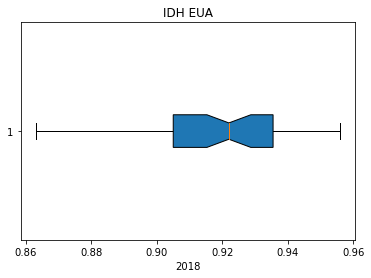

In [77]:
plt.boxplot(new_idh['2018'], vert=False, showfliers = False, notch = True,patch_artist = True)
plt.title('IDH EUA')
plt.xlabel('2018')

## Aqui conferimos que quando recuperados pelo mesmo nome, retornam os mesmo índices:

In [87]:
values = []
for i in candidates.state:
    values.append(new_idh.loc[new_idh.Region == i]['Region'].values[0])
len(values)

349

In [99]:
# Então adicionaremos esses itens aos respectivos itens na tabela
values = []
for i in candidates.state:
    values.append(new_idh.loc[new_idh.Region == i]['2018'].values)

idh_per_state = pd.DataFrame(values, columns=['IDH'])
candidates = candidates.join(idh_per_state)
candidates.head()

,Unnamed: 0,state,candidate,party,total_state,IDH
0,0,Delaware,Joe Biden,DEM,296268,0.930
1,1,Delaware,Donald Trump,REP,200603,0.930
2,2,Delaware,Jo Jorgensen,LIB,5000,0.930
3,3,Delaware,Howie Hawkins,GRN,2139,0.930
4,12,District of Columbia,Joe Biden,DEM,285728,0.942


Iremos testar se os dados que adicionamos à tabela de candidatos está corretamente ajustada

In [118]:
for i in range(len(candidates.state)):
    equal = new_idh.loc[new_idh.Region == candidates.state[i]]['2018'].values[0] == candidates.IDH[i]
    if not equal:
        print('Erro na sincronização dos dados')